In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


# Erster Import

In [2]:
#Importieren wir die vorgefertige Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

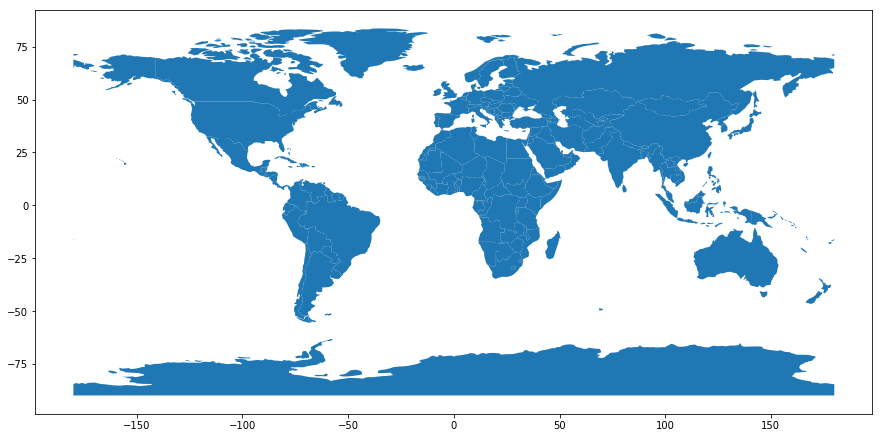

In [3]:
world.plot(figsize=(15,20))

In [4]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


In [5]:
pd.set_option('display.max_colwidth',50)

In [6]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


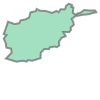

In [7]:
world['geometry'][0]

In [8]:
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']
world['gdp_per_cap'] = world['gdp_per_cap'] * 1000

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


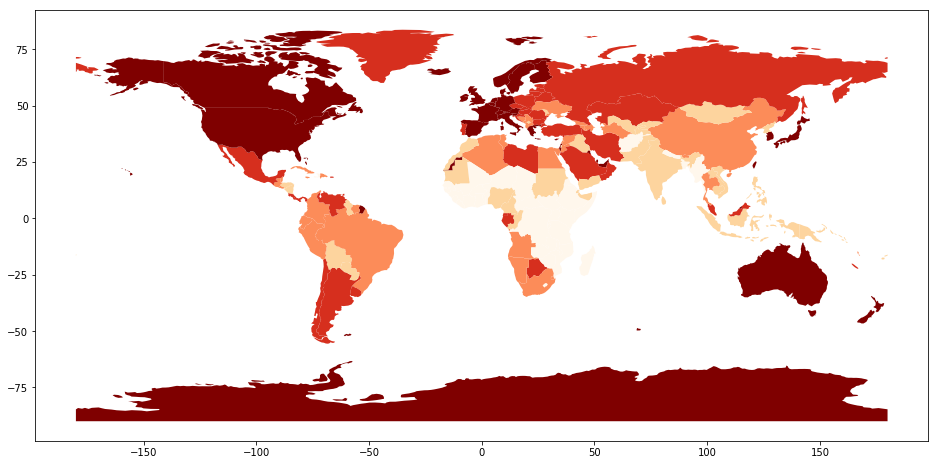

In [9]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));
plt.savefig('welt.pdf')

In [10]:
!ls

01 APIs Google Indisch.ipynb
01 APIs Google Vietnamesisch.ipynb
01 APIs und Authentifikation (Google API).ipynb
02 Aufgaben Tag 16.ipynb
02 Geopandas.ipynb
03 Geopandas.ipynb
03 b +Geopandas.ipynb
GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson
SHAPEFILE_LV03_LN02
franzrest_allcities.csv
indischrest_allcities.csv
indischrest_top20cities.csv
italrest_allcities.csv
italrest_top10cities.csv
italrests.csv
shapePLZ
switzerland.pdf
vietnamrest_allcities.csv
welt.pdf


In [11]:
!open "welt.pdf"

In [12]:
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [39]:
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp")
#https://map.geo.admin.ch/?lang=en&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.swisstopo.swissboundaries3d-gemeinde-flaeche.fill&layers_visibility=false,false,false,false,true&layers_timestamp=18641231,,,,&catalogNodes=457,510

In [40]:
del ch["sprachcode_"]

In [41]:
ch = ch.dropna()

In [42]:
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4134 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        4134 non-null object
onrp           4134 non-null float64
bfsnr          4134 non-null float64
plz_typ        4134 non-null float64
postleitzah    4134 non-null float64
plz_zz         4134 non-null object
gplz           4134 non-null float64
ortbez18       4134 non-null object
ortbez27       4134 non-null object
kanton         4134 non-null object
sprachcode     4134 non-null float64
briefz_durc    4134 non-null float64
gilt_ab_dat    4134 non-null float64
plz_briefzu    4134 non-null float64
plz_coff       4134 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 549.0+ KB


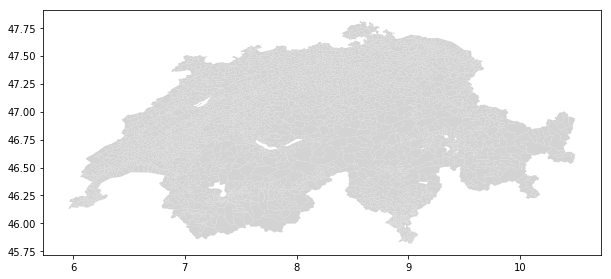

In [44]:
ch.plot(figsize=(10,10), color='lightgrey')
plt.savefig('switzerland.pdf')

In [45]:
df = pd.read_csv('italrest_top10cities.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 6 columns):
Unnamed: 0    1923 non-null int64
Addresse      1923 non-null object
Lat           1923 non-null float64
Lng           1923 non-null float64
Name          1923 non-null object
Rating        1923 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 90.2+ KB


In [47]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating
0,0,"Am Münsterhof, Waaggasse 7, 8001 Zürich, Switz...",47.370115,8.540238,Orsini,4.6
1,1,"Niederdorfstrasse 80, 8001 Zürich, Switzerland",47.376028,8.544154,La Pasta,4.4
2,2,"Badenerstrasse 275, 8003 Zürich, Switzerland",47.376137,8.514691,Taverne da Angelo,4.4
3,3,"Gertrudstrasse 37, 8003 Zürich, Switzerland",47.373396,8.515301,Da Michelangelo,4.5
4,4,"Forchstrasse 168, 8032 Zürich, Switzerland",47.360204,8.565730,Marcellino,4.8


In [48]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row['Lng'], row['Lat'])
#df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1)

In [49]:
df.head()

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points
0,0,"Am Münsterhof, Waaggasse 7, 8001 Zürich, Switz...",47.370115,8.540238,Orsini,4.6,POINT (8.540237599999999 47.3701154)
1,1,"Niederdorfstrasse 80, 8001 Zürich, Switzerland",47.376028,8.544154,La Pasta,4.4,POINT (8.544154199999999 47.3760283)
2,2,"Badenerstrasse 275, 8003 Zürich, Switzerland",47.376137,8.514691,Taverne da Angelo,4.4,POINT (8.5146914 47.3761366)
3,3,"Gertrudstrasse 37, 8003 Zürich, Switzerland",47.373396,8.515301,Da Michelangelo,4.5,POINT (8.515301199999998 47.37339559999999)
4,4,"Forchstrasse 168, 8032 Zürich, Switzerland",47.360204,8.565730,Marcellino,4.8,POINT (8.56573 47.36020389999999)


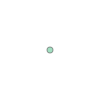

In [50]:
df['Points'][0]

In [51]:
italrests = gpd.GeoDataFrame(df, geometry=list(df['Points']))
italrests.to_csv('italrests.csv', index=False)

# Karte und Punkte: Was ist hier passiert?

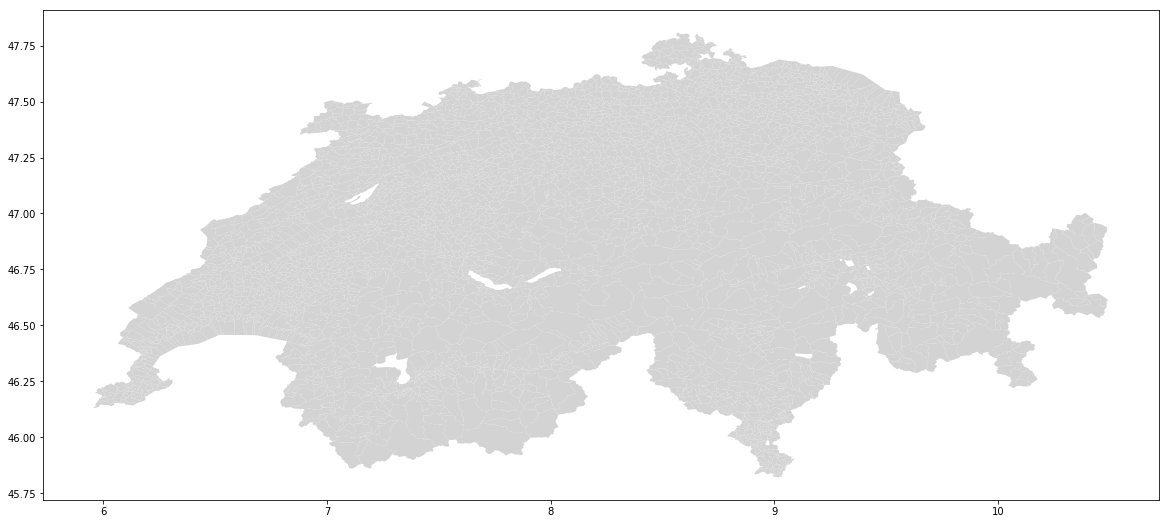

In [52]:
ch.plot(figsize=(20,20), color='lightgrey')

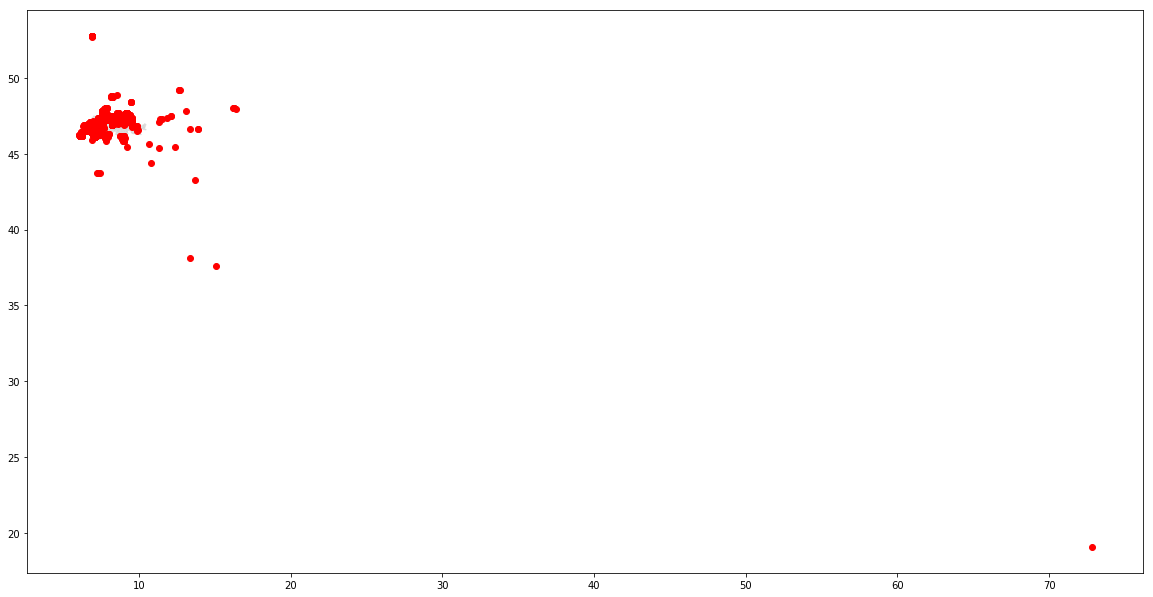

In [53]:
ax = ch.plot(figsize=(20,20), color='lightgrey')
italrests.plot(ax=ax, color='red')

# Schneiden wir die Koordinaten ab

In [54]:
italrests = italrests[italrests['Lat'] < 48]
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

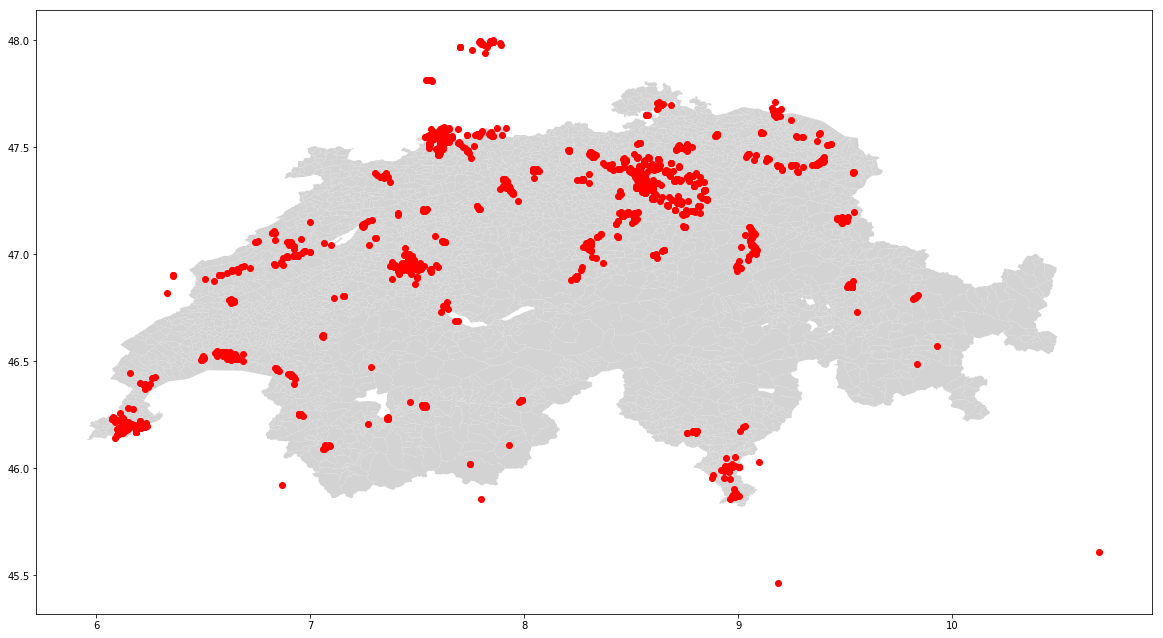

In [62]:
ax = ch.plot(figsize=(20,20), color='lightgrey')
italrests.plot(ax=ax, color='red')

# SpatialJoin

In [63]:
ch.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

In [64]:
ch = ch.dropna()

In [65]:
ch_with_italrests = gpd.sjoin(italrests, ch, how="inner", op='intersects')

In [66]:
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4134 entries, 0 to 5282
Data columns (total 16 columns):
rec_art        4134 non-null object
onrp           4134 non-null float64
bfsnr          4134 non-null float64
plz_typ        4134 non-null float64
postleitzah    4134 non-null float64
plz_zz         4134 non-null object
gplz           4134 non-null float64
ortbez18       4134 non-null object
ortbez27       4134 non-null object
kanton         4134 non-null object
sprachcode     4134 non-null float64
briefz_durc    4134 non-null float64
gilt_ab_dat    4134 non-null float64
plz_briefzu    4134 non-null float64
plz_coff       4134 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(7)
memory usage: 549.0+ KB


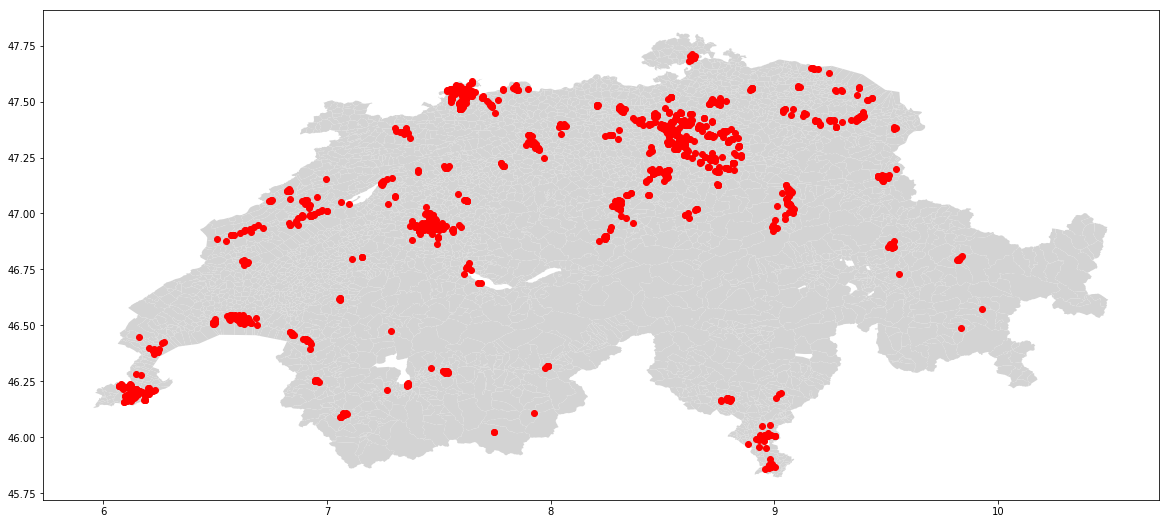

In [67]:
ax = ch.plot(figsize=(20,20), color='lightgrey')
ch_with_italrests.plot(ax=ax, color='red')

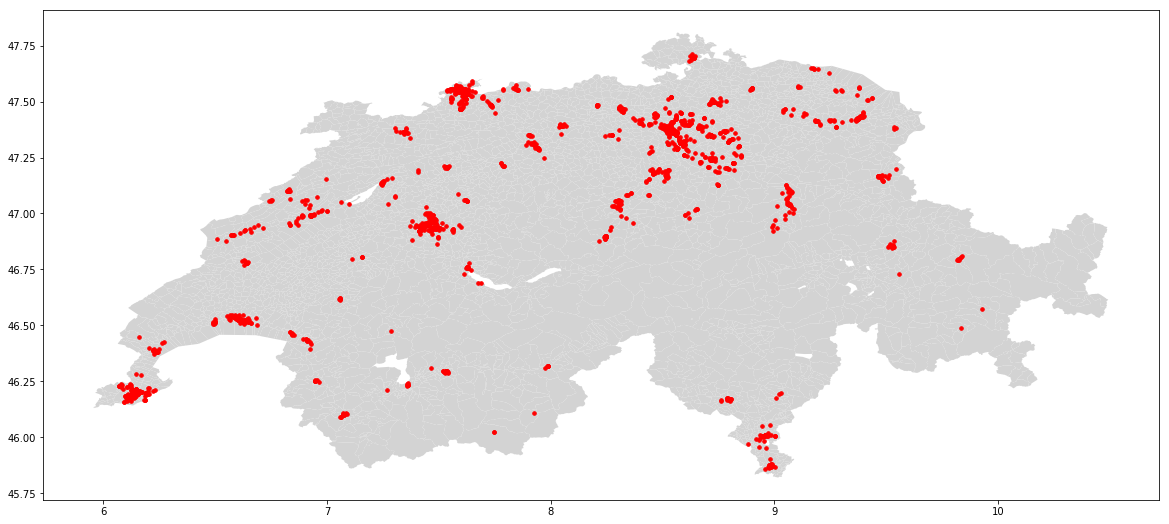

In [76]:
ax = ch.plot(figsize=(20,20), color='lightgrey')
ch_with_italrests.plot(ax=ax, color='red', marker='.', markersize=50)

# Schauen wir uns Zürich an

In [70]:
#https://statistik.zh.ch/internet/justiz_inneres/statistik/de/daten/Raeumliche_Daten/Basiskarten.html
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F/GEN_A4_GEMEINDEN_2018_F.shp")

In [71]:
zh.crs = {'init' :'epsg:3857'}
italrests.crs = {'init' :'epsg:3857'}

In [72]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')

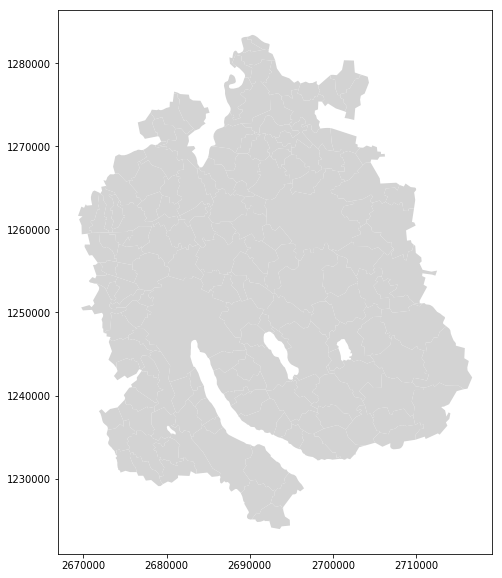

In [74]:
zh.plot(figsize=(10,10), color='lightgrey')

# Warum kommen hier keine Punkte vor?

In [ ]:
# Das hat mit dem Sonderfall Schweiz zu tun.
# https://github.com/ValentinMinder/Swisstopo-WGS84-LV03

In [ ]:
# Frage: Wir könnten wir damit unsere Koordinaten umwandeln?

In [93]:
zh.head()

,BFS,NAME,BEZIRKSNAM,ART_TEXT,ART_CODE,SHAPE_Leng,SHAPE_Area,geometry
0,86,Dielsdorf,Dielsdorf,Gemeinde,1,12046.396046,5.616486e+06,"POLYGON ((2678233.626499999 1260372.840800002,..."
1,213,Brütten,Winterthur,Gemeinde,1,11342.209841,6.556066e+06,"POLYGON ((2692447.137800001 1260564.256300002,..."
2,226,Schlatt (ZH),Winterthur,Gemeinde,1,15513.841928,8.844313e+06,"POLYGON ((2704655.376800001 1260245.353200004,..."
3,90,Niederhasli,Dielsdorf,Gemeinde,1,19476.372746,1.148451e+07,"POLYGON ((2679283.133200001 1260344.441399999,..."
4,63,Lufingen,Bülach,Gemeinde,1,9651.800965,4.841958e+06,"POLYGON ((2687672.1384 1260794.119199999, 2687..."


In [81]:
import math

In [95]:
class GPSConverter(object):
    
    # GPS Converter class which is able to perform convertions between the 
    # CH1903 and WGS84 system.
    
    # Convert CH y/x/h to WGS height
    def CHtoWGSheight(self, y, x, h):
        # Axiliary values (% Bern)
        y_aux = (y - 600000) / 1000000
        x_aux = (x - 200000) / 1000000
        h = (h + 49.55) - (12.60 * y_aux) - (22.64 * x_aux)
        return h

    # Convert CH y/x to WGS lat
    def CHtoWGSlat(self, y, x):
        # Axiliary values (% Bern)
        y_aux = (y - 600000) / 1000000
        x_aux = (x - 200000) / 1000000
        lat = (16.9023892 + (3.238272 * x_aux)) + \
                - (0.270978 * pow(y_aux, 2)) + \
                - (0.002528 * pow(x_aux, 2)) + \
                - (0.0447 * pow(y_aux, 2) * x_aux) + \
                - (0.0140 * pow(x_aux, 3))
        # Unit 10000" to 1" and convert seconds to degrees (dec)
        lat = (lat * 100) / 36
        return lat
    
    # Convert CH y/x to WGS long
    def CHtoWGSlng(self, y, x):
        # Axiliary values (% Bern)
        y_aux = (y - 600000) / 1000000
        x_aux = (x - 200000) / 1000000
        lng = (2.6779094 + (4.728982 * y_aux) + \
                + (0.791484 * y_aux * x_aux) + \
                + (0.1306 * y_aux * pow(x_aux, 2))) + \
                - (0.0436 * pow(y_aux, 3))
        # Unit 10000" to 1" and convert seconds to degrees (dec)
        lng = (lng * 100) / 36
        return lng

    # Convert decimal angle (° dec) to sexagesimal angle (dd.mmss,ss)
    def DecToSexAngle(self, dec):
        degree = int(math.floor(dec))
        minute = int(math.floor((dec - degree) * 60))
        second = (((dec - degree) * 60) - minute) * 60
        return degree + (float(minute) / 100) + (second / 10000)
		
    # Convert sexagesimal angle (dd.mmss,ss) to seconds
    def SexAngleToSeconds(self, dms):
        degree = 0 
        minute = 0 
        second = 0
        degree = math.floor(dms)
        minute = math.floor((dms - degree) * 100)
        second = (((dms - degree) * 100) - minute) * 100
        return second + (minute * 60) + (degree * 3600)

    # Convert sexagesimal angle (dd.mmss) to decimal angle (degrees)
    def SexToDecAngle(self, dms):
        degree = 0
        minute = 0
        second = 0
        degree = math.floor(dms)
        minute = math.floor((dms - degree) * 100)
        second = (((dms - degree) * 100) - minute) * 100
        return degree + (minute / 60) + (second / 3600)
    
    # Convert WGS lat/long (° dec) and height to CH h
    def WGStoCHh(self, lat, lng, h):
        lat = self.DecToSexAngle(lat)
        lng = self.DecToSexAngle(lng)
        lat = self.SexAngleToSeconds(lat)
        lng = self.SexAngleToSeconds(lng)
        # Axiliary values (% Bern)
        lat_aux = (lat - 169028.66) / 10000
        lng_aux = (lng - 26782.5) / 10000
        h = (h - 49.55) + (2.73 * lng_aux) + (6.94 * lat_aux)
        return h

    # Convert WGS lat/long (° dec) to CH x
    def WGStoCHx(self, lat, lng):
        lat = self.DecToSexAngle(lat)
        lng = self.DecToSexAngle(lng)
        lat = self.SexAngleToSeconds(lat)
        lng = self.SexAngleToSeconds(lng)
        # Axiliary values (% Bern)
        lat_aux = (lat - 169028.66) / 10000
        lng_aux = (lng - 26782.5) / 10000
        x = ((200147.07 + (308807.95 * lat_aux) + \
            + (3745.25 * pow(lng_aux, 2)) + \
            + (76.63 * pow(lat_aux,2))) + \
            - (194.56 * pow(lng_aux, 2) * lat_aux)) + \
            + (119.79 * pow(lat_aux, 3))
        return x

	# Convert WGS lat/long (° dec) to CH y
    def WGStoCHy(self, lat, lng):
        lat = self.DecToSexAngle(lat)
        lng = self.DecToSexAngle(lng)
        lat = self.SexAngleToSeconds(lat)
        lng = self.SexAngleToSeconds(lng)
        # Axiliary values (% Bern)
        lat_aux = (lat - 169028.66) / 10000
        lng_aux = (lng - 26782.5) / 10000
        y = (600072.37 + (211455.93 * lng_aux)) + \
            - (10938.51 * lng_aux * lat_aux) + \
            - (0.36 * lng_aux * pow(lat_aux, 2)) + \
            - (44.54 * pow(lng_aux, 3))
        return y

    def LV03toWGS84(self, east, north, height):
        
        
        #Convert LV03 to WGS84 Return a array of double that contain lat, long,
        #and height
        
        d = []
        d.append(self.CHtoWGSlat(east, north))
        d.append(self.CHtoWGSlng(east, north))
        d.append(self.CHtoWGSheight(east, north, height))
        return d
        
    def WGS84toLV03(self, latitude, longitude, ellHeight):
        
        #Convert WGS84 to LV03 Return an array of double that contaign east,
        #north, and height
        
        d = []
        d.append(self.WGStoCHy(latitude, longitude))
        d.append(self.WGStoCHx(latitude, longitude))
        d.append(self.WGStoCHh(latitude, longitude, ellHeight))
        return d
        


In [97]:
# Example usage for the GPSConverter class.

converter = GPSConverter()

 # Coordinates
lv03 = [2678233.626499999, 1260372.840800002, 0]
wgs84  = []
    
# Convert LV03 to WGS84 coordinates
wgs84 = converter.LV03toWGS84(lv03[0], lv03[1], lv03[2])

print ("LV034: ")
print (lv03)
print ("WGS84: ")
print (wgs84)

LV034: 
[2678233.626499999, 1260372.840800002, 0]
WGS84: 
[52.61540072910625, 39.344053629945755, -0.6425848096120355]


# Ein einfacher Work Around

In [98]:
zh = gpd.read_file("GEN_A4_GEMEINDEN_SEEN_2018_F_WGS84_.geojson")

In [99]:
zh_with_italrests = gpd.sjoin(italrests, zh, how="inner", op='intersects')
zh.crs = {'init' :'epsg:4326'}
italrests.crs = {'init' :'epsg:4326'}

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


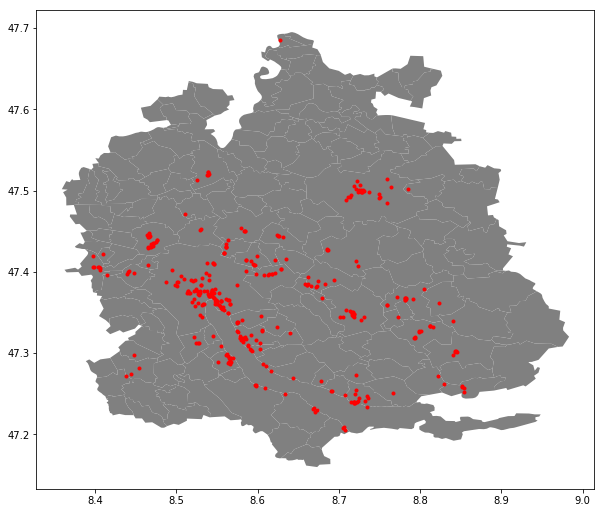

In [100]:
ax = zh.plot(figsize=(10,10), color='grey')
zh_with_italrests.plot(ax=ax, color='red', marker=".")